In [ ]:
import numpy as np
import pandas as pd
import math

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option("display.max_columns", None)
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

In [ ]:
dataset = pd.read_csv('/content/day.csv', encoding= 'unicode_escape')

# **DATA INSPECTION**

In [ ]:
print(f' The shape of dataset is {(dataset.shape)} \n Total Rows are : {(dataset.shape)[0]}\n Total Columns are : {(dataset.shape)[1]}')

 The shape of dataset is (730, 16) 
 Total Rows are : 730
 Total Columns are : 16


In [ ]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
dataset.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
dataset.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
dataset.describe(include = 'all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
unique,NaN,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,31-12-2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,365.500000,NaN,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,NaN,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,NaN,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000


**OBSERVATIONS**

In [ ]:
dataset.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
dataset.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [ ]:
dataset['season'].value_counts()

,count
season,
3,188
2,184
1,180
4,178


In [ ]:
dataset['holiday'].value_counts()

,count
holiday,
0,709
1,21


In [ ]:
dataset['weekday'].value_counts()

,count
weekday,
6,105
0,105
1,105
2,104
4,104
5,104
3,103


In [ ]:
dataset['workingday'].value_counts()

,count
workingday,
1,499
0,231


In [ ]:
dataset['mnth'].value_counts()

,count
mnth,
1,62
3,62
7,62
5,62
12,62
10,62
8,62
4,60
9,60


In [ ]:
dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
duplicates = dataset.duplicated().sum()
print(f"We have {duplicates} duplicate rows in our Bike Data.")

We have 0 duplicate rows in our Bike Data.


In [ ]:
dataset = dataset.drop('instant',axis=1)
print("Instant Column is dropped")

Instant Column is dropped


In [ ]:
dataset = dataset.drop('dteday',axis=1)
print("dteday Colummn is dropped")

dteday Colummn is dropped


In [ ]:
dataset.shape

(730, 14)

In [ ]:
dataset.head(1)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985


# Exploratory Data Analysis

In [ ]:
numeric_cols = dataset.select_dtypes(include=[np.number]).columns.tolist()
predictor_numeric = [c for c in numeric_cols if c != 'cnt']
if dataset[predictor_numeric].isna().sum().sum() > 0:
    for col in predictor_numeric:
        if dataset[col].isna().sum() > 0:
            dataset[col].fillna(dataset[col].median(), inplace=True)

In [ ]:
# 3. Decide categorical vs numeric features
# Candidate categorical columns commonly in 'day' dataset:


candidate_cat = ['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit',
                 'year', 'mnth', 'is_weekend']
#Filter valid categorical columns from dataframe
categorical_cols = [c for c in candidate_cat if c in dataset.columns and dataset[c].dtype != 'float64']

#Verify categorical nature based on unique values
categorical_cols = [c for c in categorical_cols if dataset[c].nunique() <= 20]

# Numeric features: all numeric predictors excluding target and categorical cols
numeric_features = [c for c in predictor_numeric if c not in categorical_cols]

print("Categorical columns:", categorical_cols)
print("Numeric columns:", numeric_features)

Categorical columns: ['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit', 'mnth']
Numeric columns: ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']


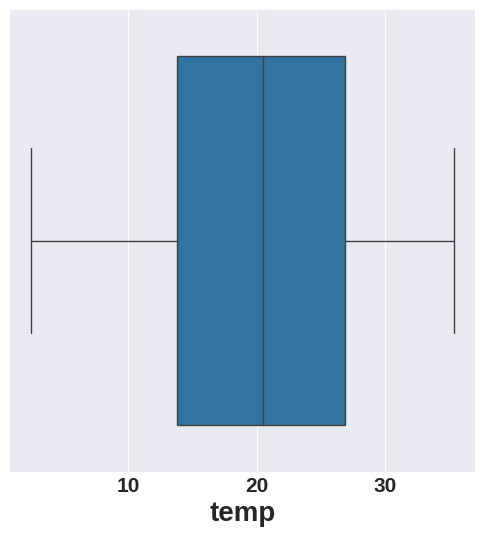

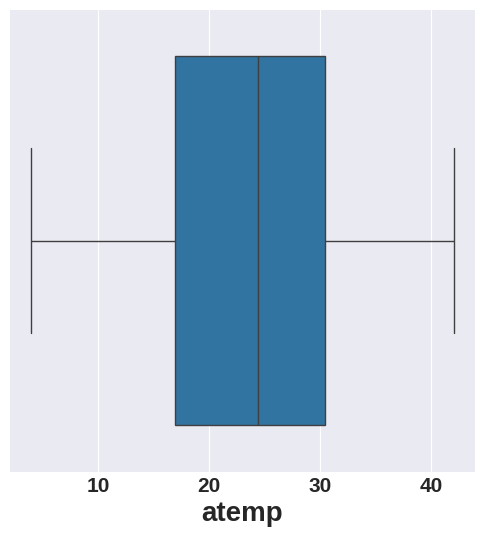

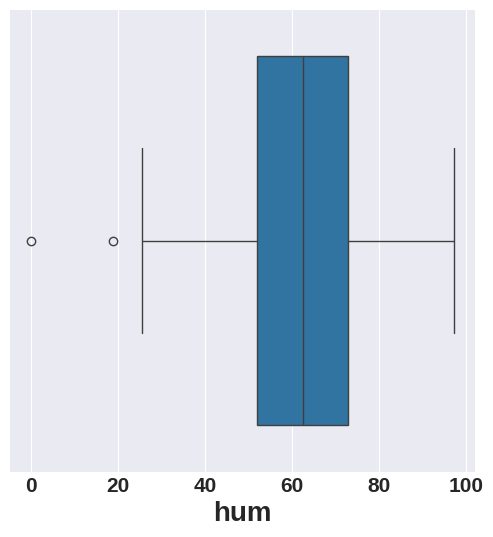

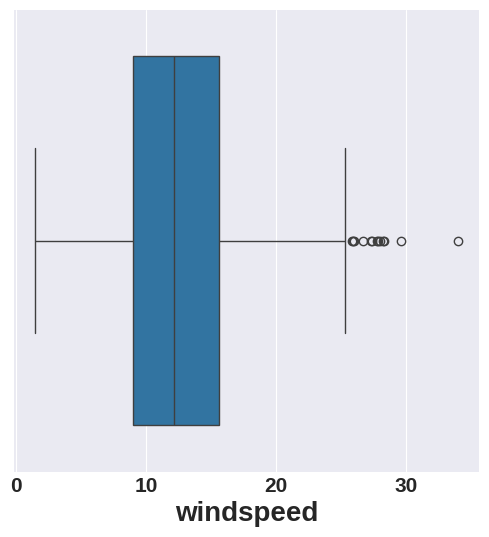

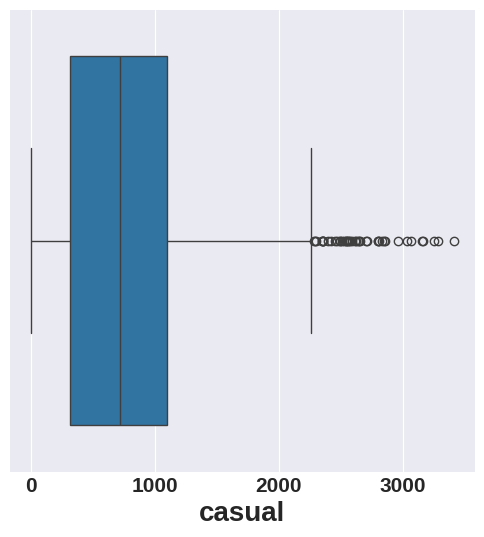

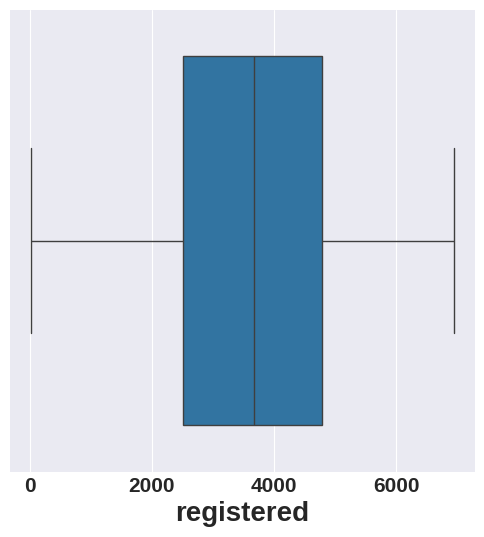

In [ ]:
# Plotting box plot of numeric columns to check outliers
for col in numeric_features:
  fig = plt.figure(figsize = (6,6))
  ax = fig.gca()
  sns.boxplot(x = dataset[col])

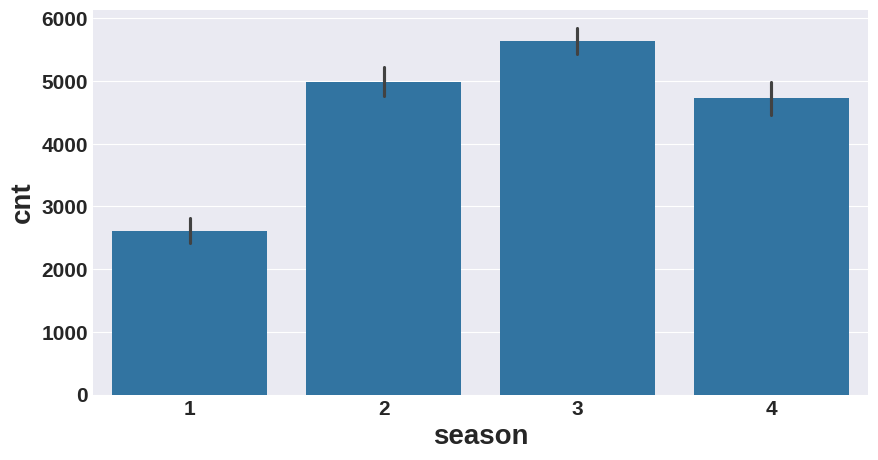

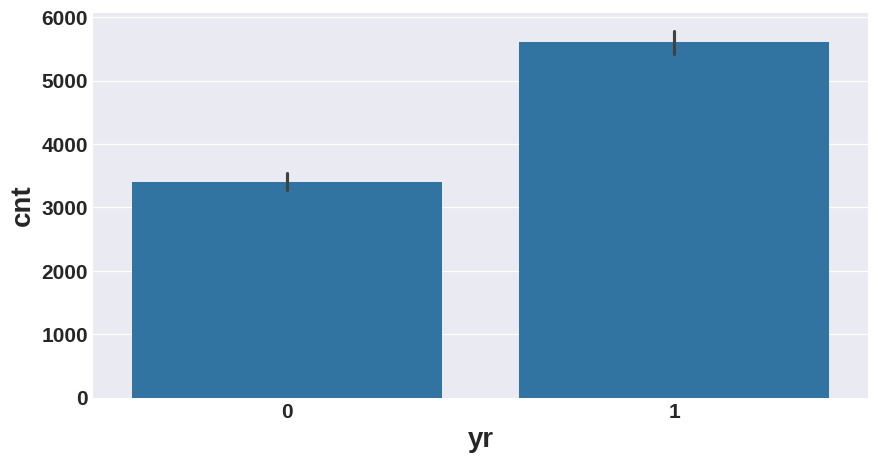

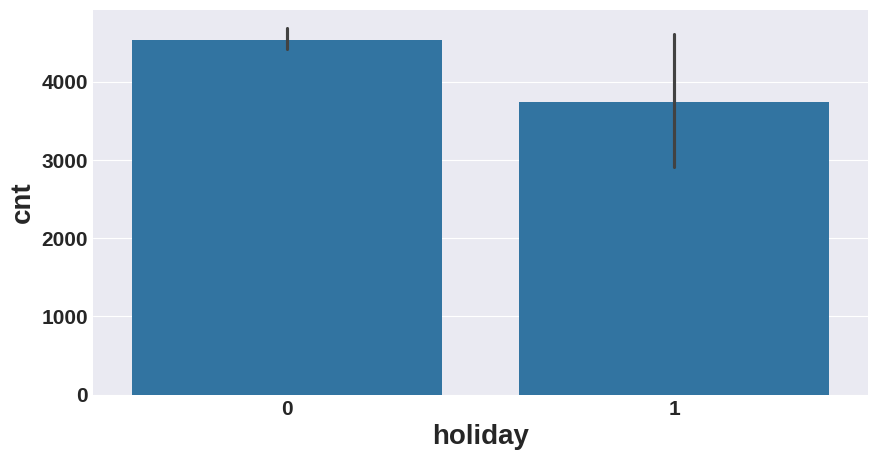

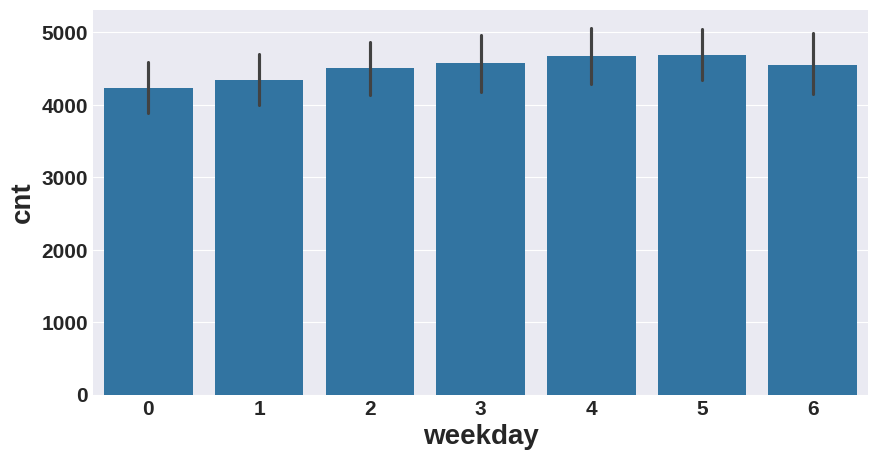

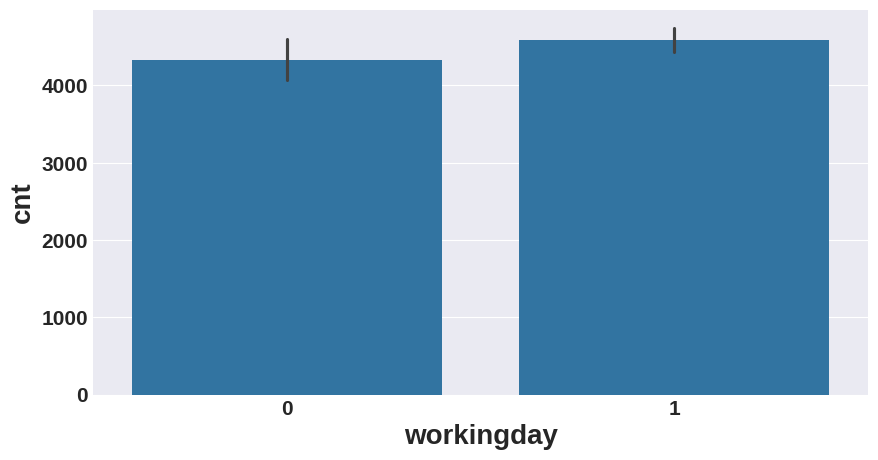

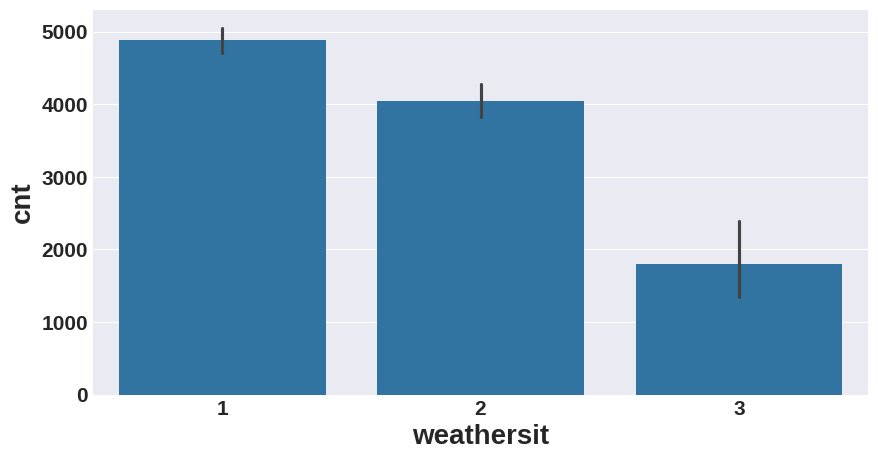

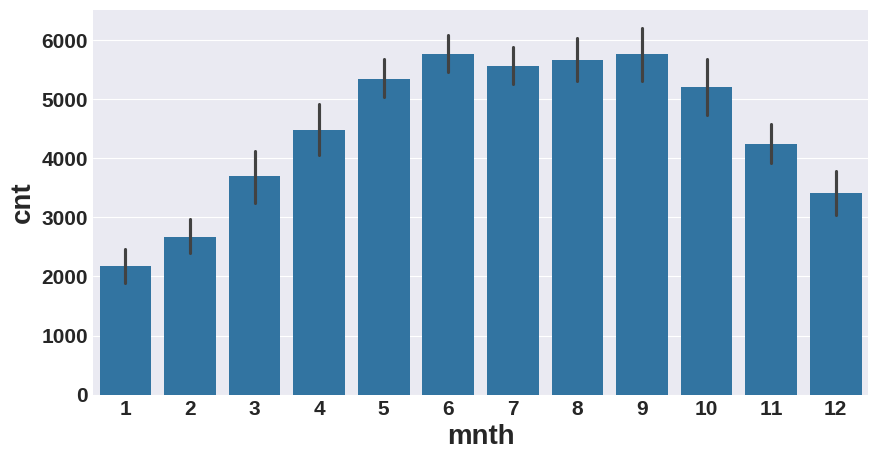

In [ ]:
# Plot barchart plot for each categorical column with respect to target variable to get insights
for col in categorical_cols:
    fig = plt.figure(figsize=(10, 5))
    ax = fig.gca()
    sns.barplot(x = dataset[col],y = dataset['cnt'])

# **Observations**
-> Most records belong to working days and clear weather condiitons, meaning people ride bikes more often when the weather is good and it's a regular weekday.     

-> The season-wise bars show higher counts during summer and fall, which indicates those seasons have more bike-sharing activity compared to winter or spring.

# Dependent Variable (cnt) Vs Categorical Columns

Text(0.5, 1.0, 'Bike Rental Trend according to month on Holiday / No Holiday')

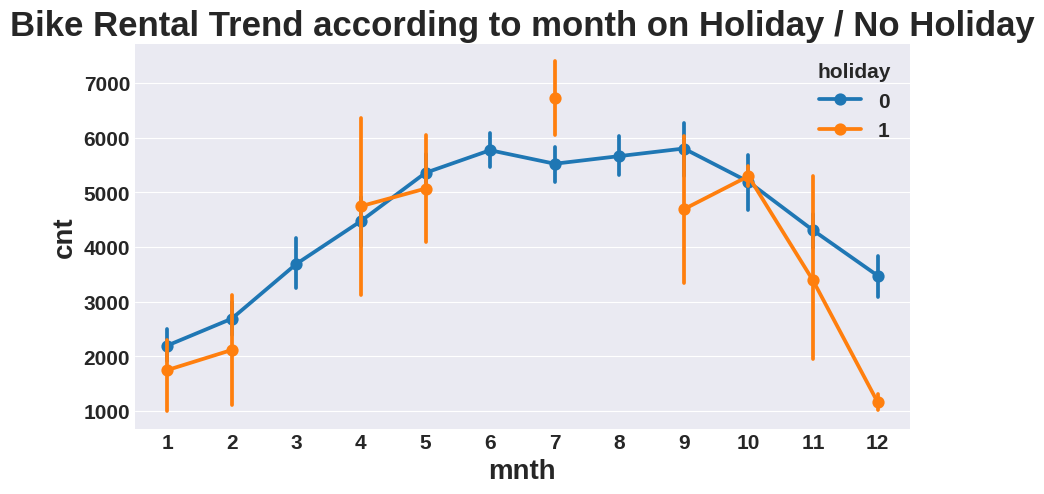

In [ ]:
plt.figure(figsize=(10,5))
sns.pointplot(x = dataset['mnth'],y = dataset['cnt'],hue = dataset['holiday'])
plt.title("Bike Rental Trend according to month on Holiday / No Holiday")

-> Bike rentals increase from Jan to Jun-sep and drop after that. Non-holidays have higher demand than holidays.

Text(0.5, 1.0, 'Bike Rental Trend according to season on Workingday')

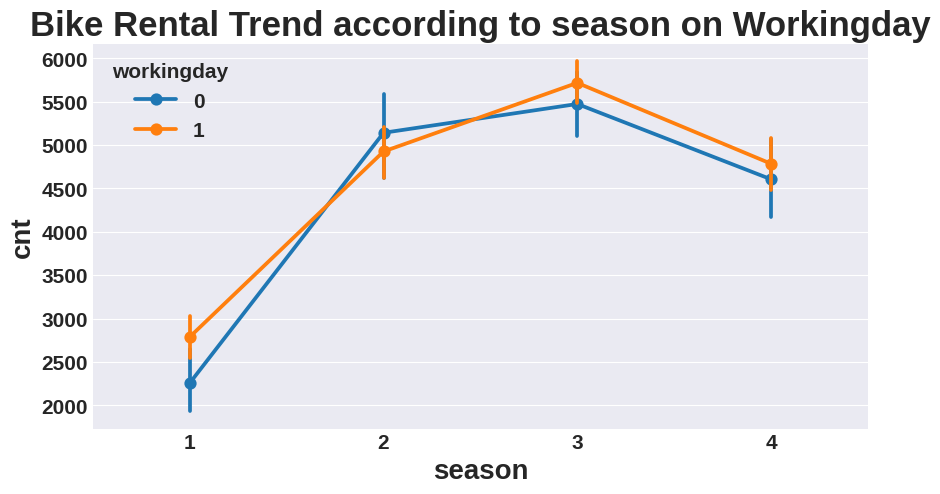

In [ ]:
plt.figure(figsize=(10,5))
sns.pointplot(x = dataset['season'],y = dataset['cnt'],hue = dataset['workingday'])
plt.title("Bike Rental Trend according to season on Workingday")

-> Summer & Fall seasons have the highest.

-> Working days > Non- working days in every season.

-> Indicates bike use mainly for daily commuting and good weather conditions.

Text(0.5, 1.0, 'Bike Rental Trend according to weekday on Working day or No working day')

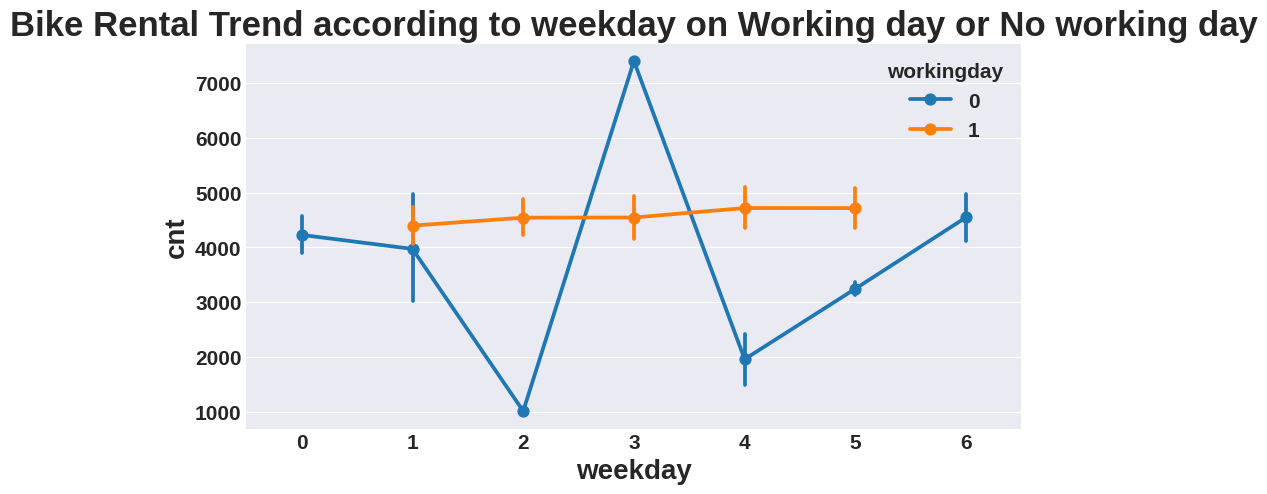

In [ ]:
plt.figure(figsize=(10,5))
sns.pointplot(x = dataset['weekday'],y = dataset['cnt'],hue = dataset['workingday'])
plt.title("Bike Rental Trend according to weekday on Working day or No working day")

-> Working days show consistent, higher rentals.

-> Non-working days show smaller peaks on weekends.

Text(0.5, 1.0, 'Bike Rental Trend according to weekday on season')

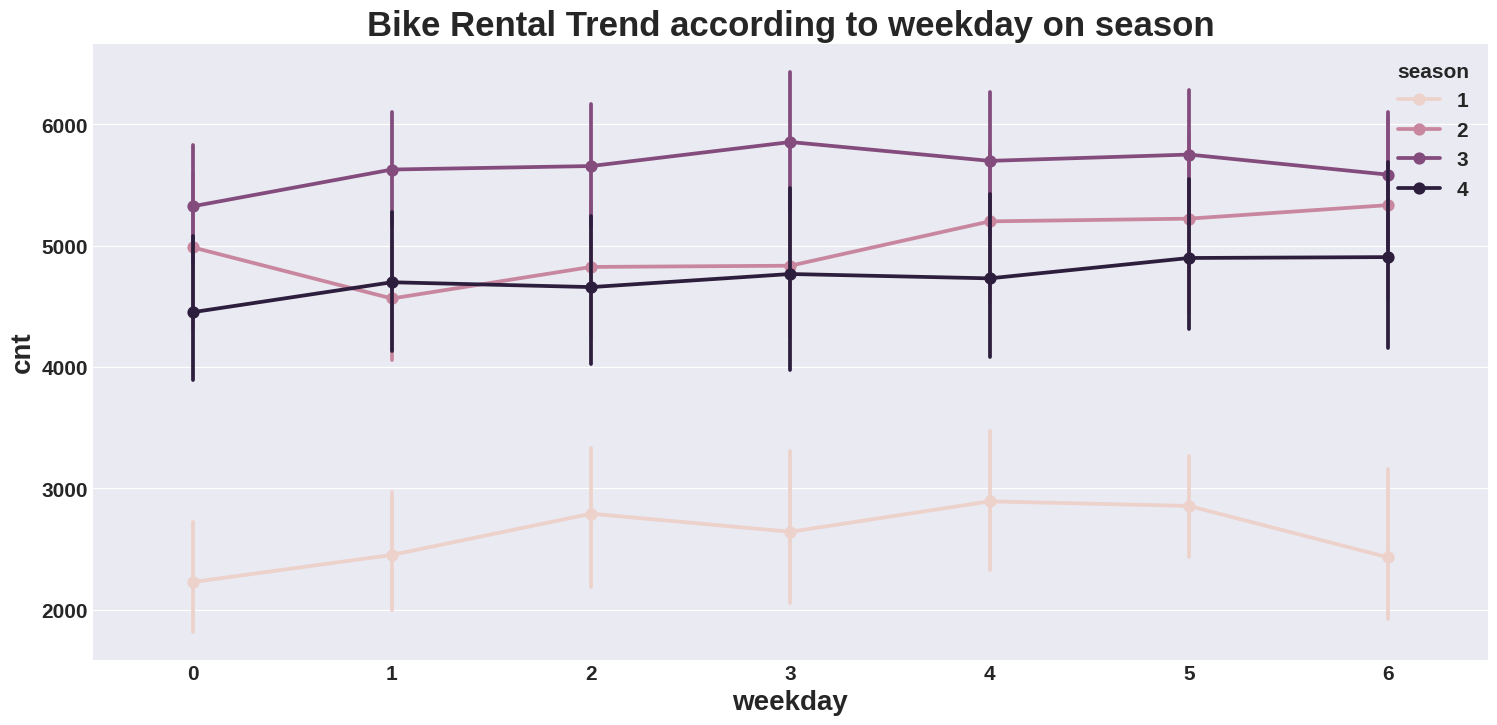

In [ ]:
plt.figure(figsize=(18,8))
sns.pointplot(x = dataset['weekday'],y = dataset['cnt'],hue = dataset['season'])
plt.title("Bike Rental Trend according to weekday on season")

-> Rentals stay fairly stable across weekdays.

-> Slight increase on weekends, especially in Summer/Fall

Text(0.5, 1.0, 'Bike Rental Trend according to weathersit on season')

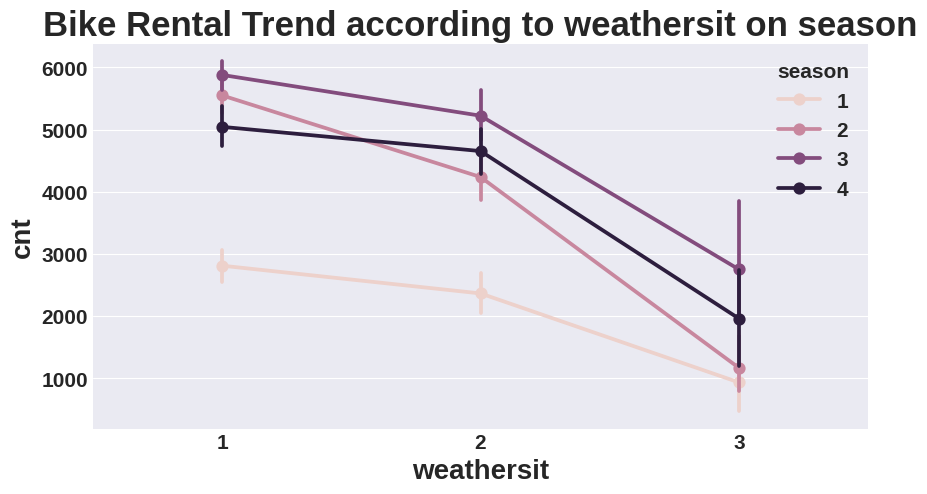

In [ ]:
plt.figure(figsize=(10,5))
sns.pointplot(x = dataset['weathersit'],y = dataset['cnt'],hue = dataset['season'])
plt.title("Bike Rental Trend according to weathersit on season")

-> Clear weather - highest rentals; Rain - lowest rentals

-> Bad weather decreases demand in all seasons.

-> Weather condition is a strong factor affecting rentals.

# Distrubion of Target Variable

<Axes: xlabel='cnt'>

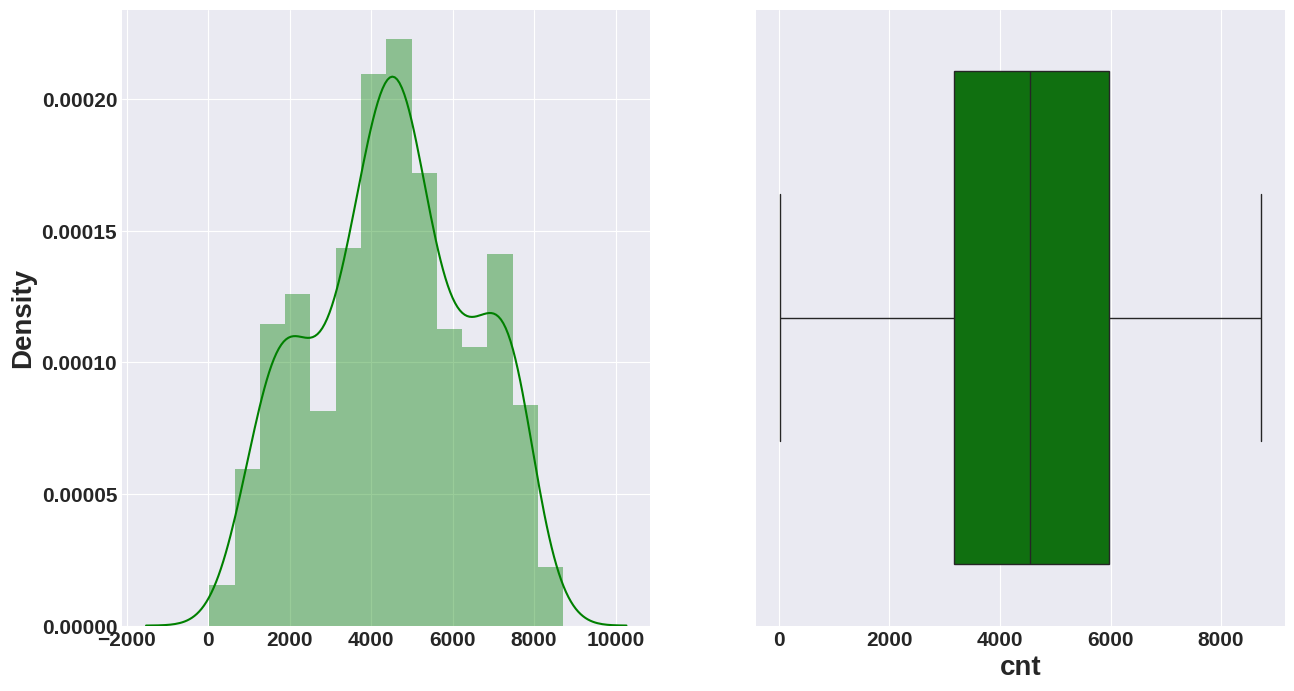

In [ ]:
# Distrubution of target varible - "Rented Bike Count"
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x= dataset['cnt'],color='g',ax=axes[0])
sns.boxplot(x = dataset['cnt'],color='g',ax=axes[1])

# Univariate Analysis

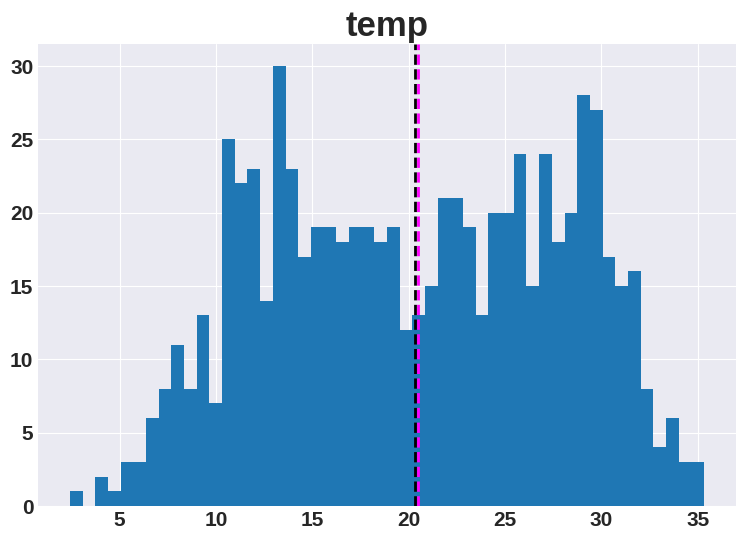

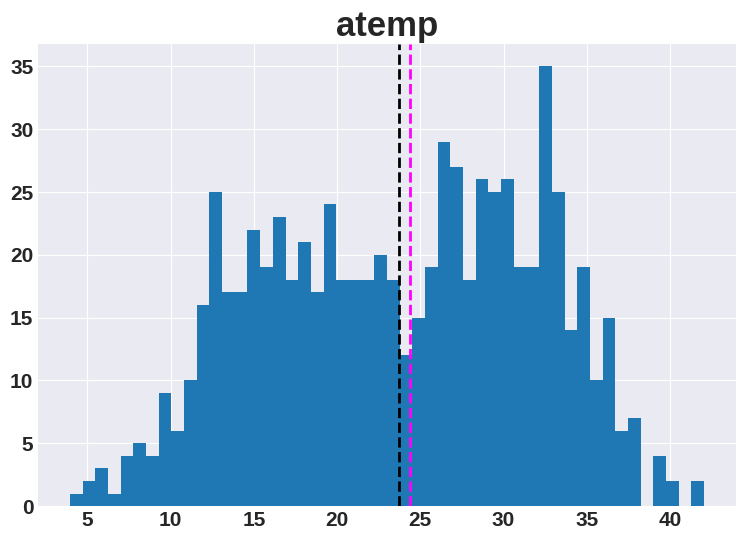

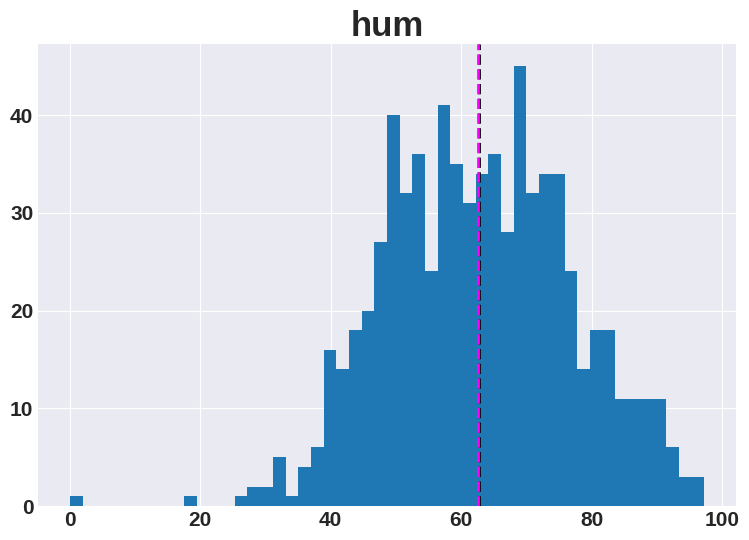

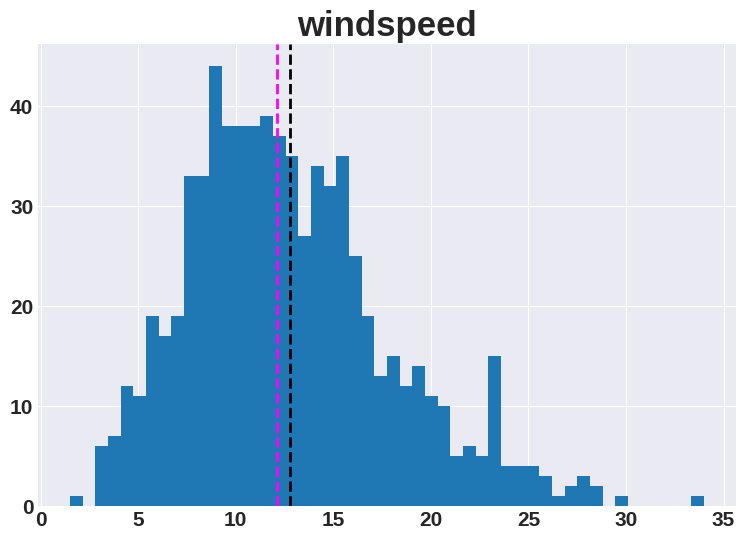

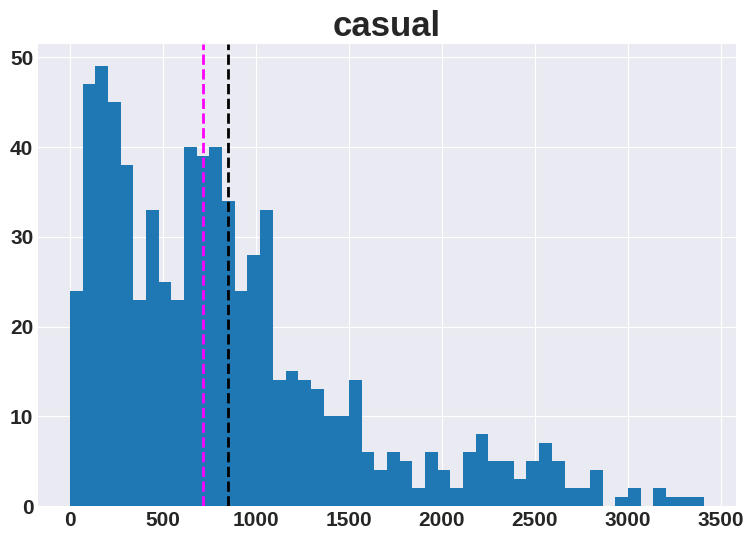

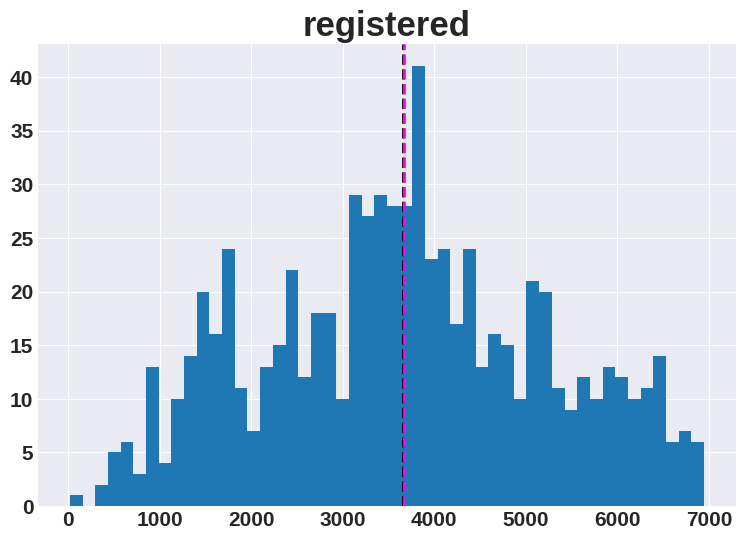

In [ ]:
for col in numeric_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = dataset[col]
    feature.hist(bins = 50, ax = ax)
    ax.axvline(feature.mean(), color='black', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='magenta', linestyle='dashed', linewidth=2)
    plt.title(col)
plt.show()

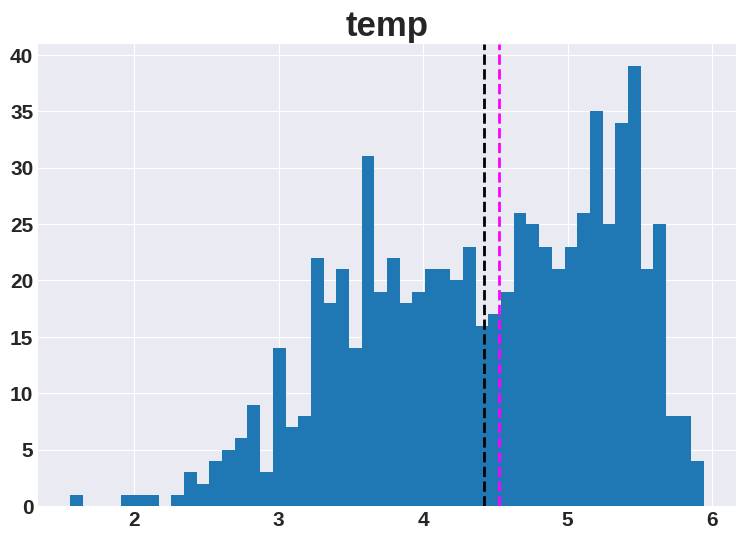

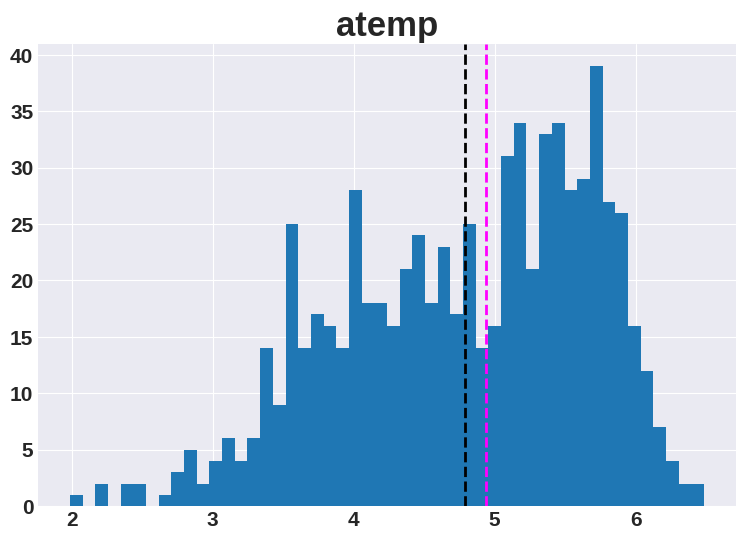

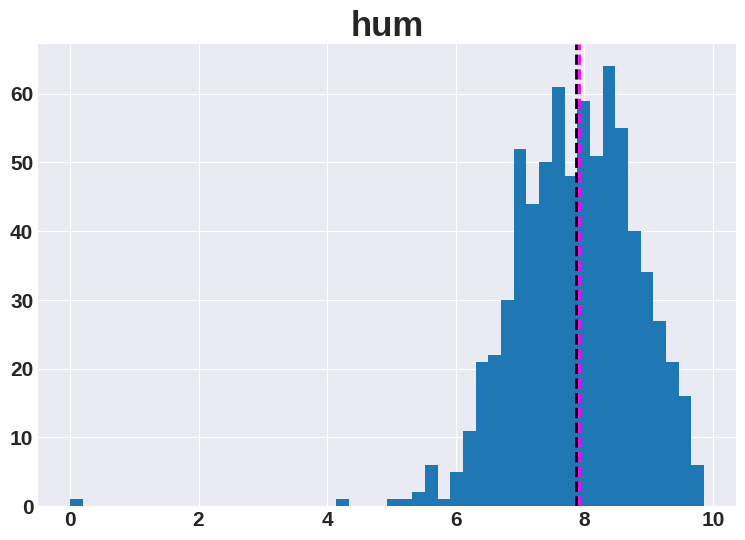

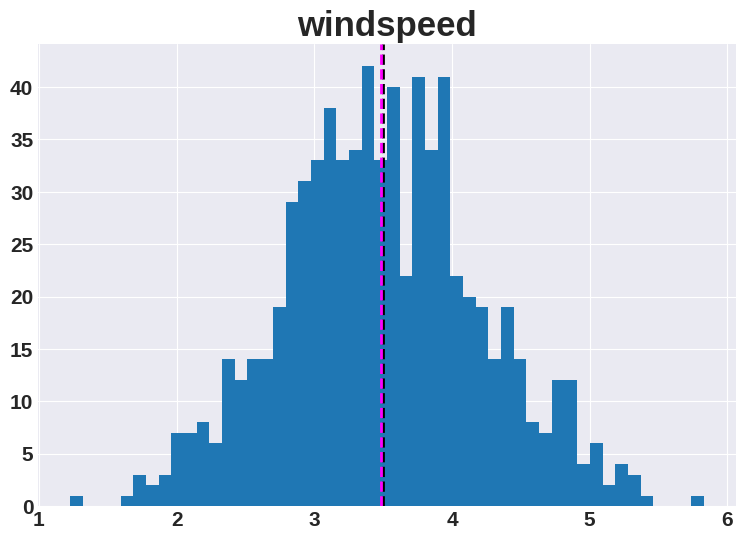

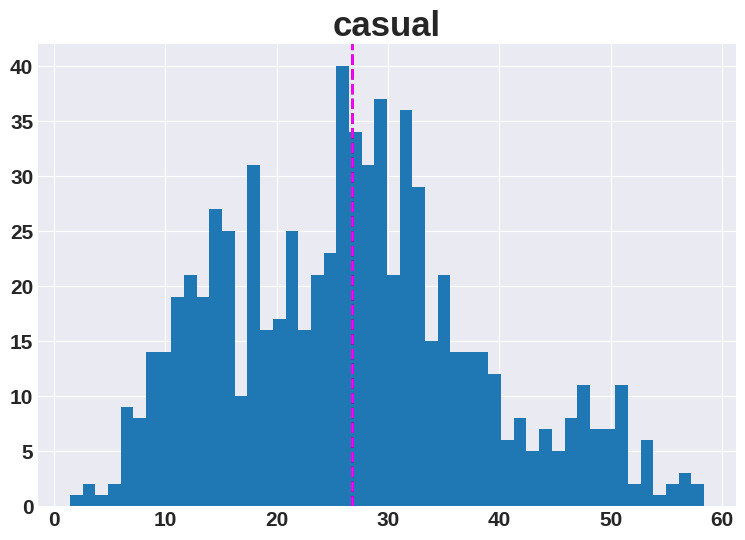

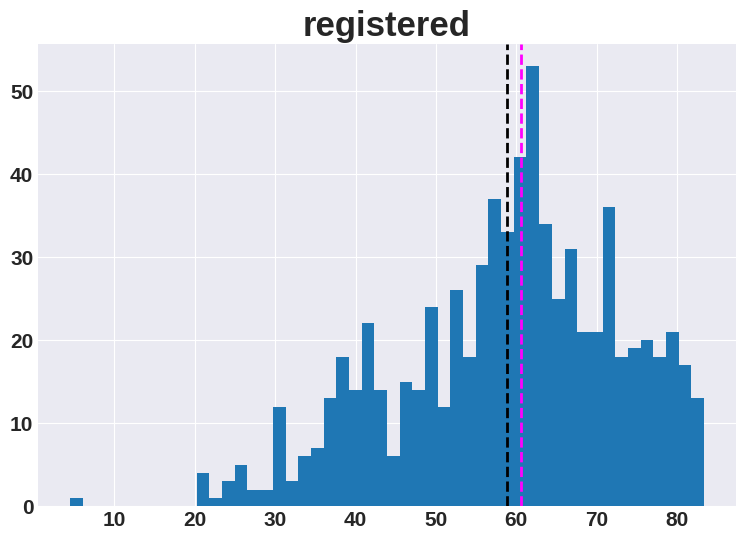

In [ ]:
# Normalizing The variables using squre root method.
for col in numeric_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = np.sqrt(dataset[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='black', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='magenta', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

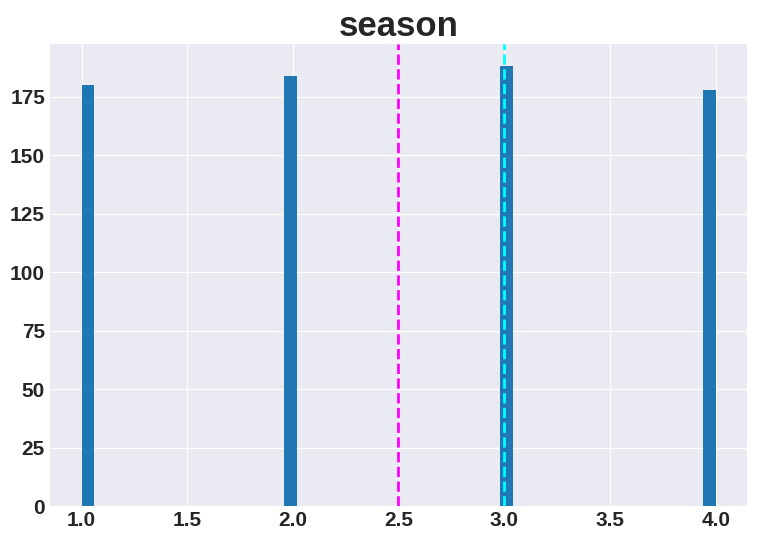

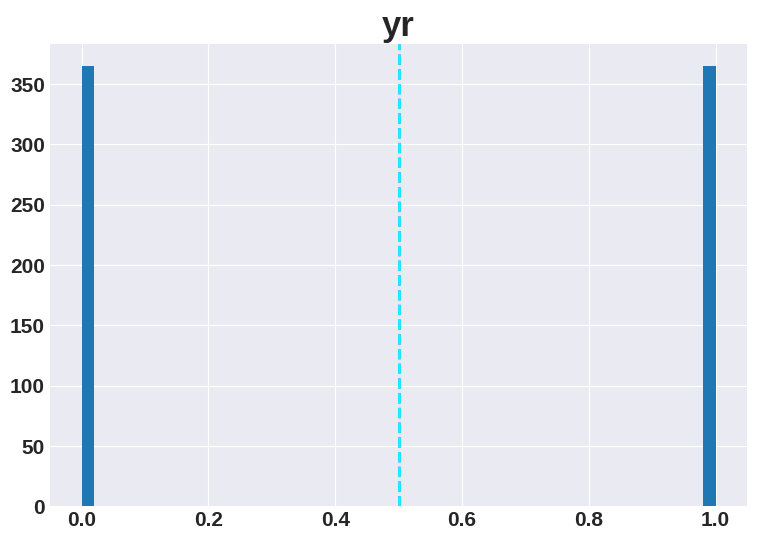

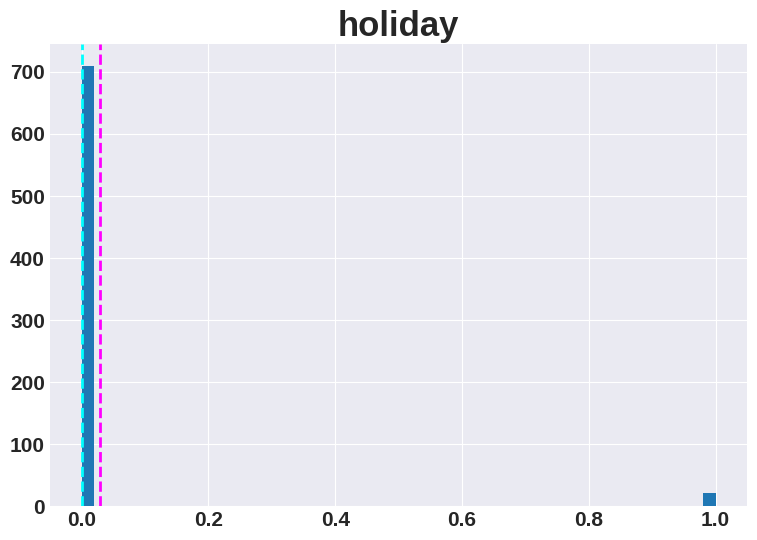

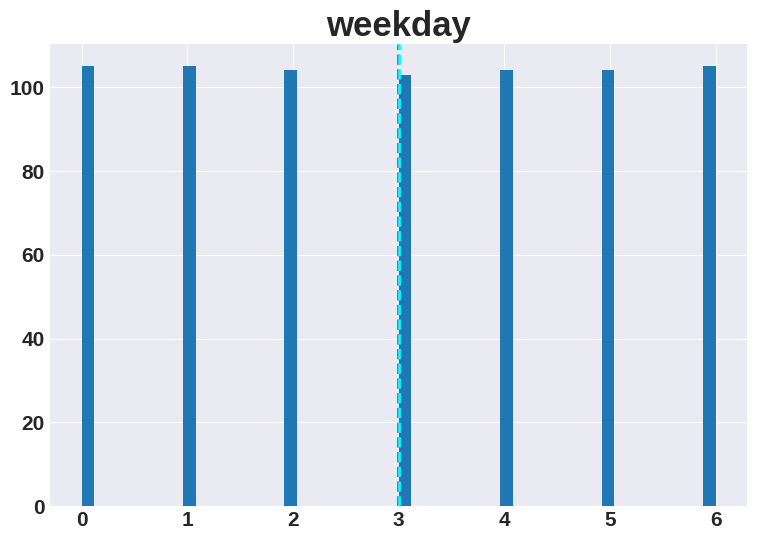

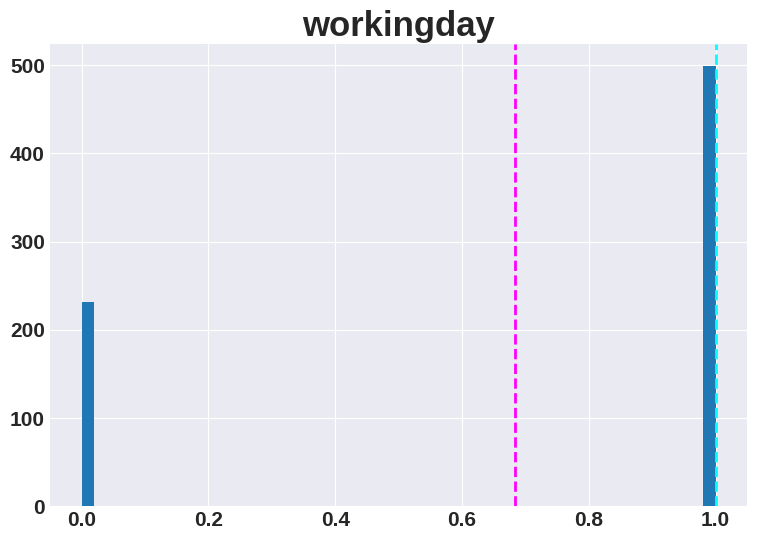

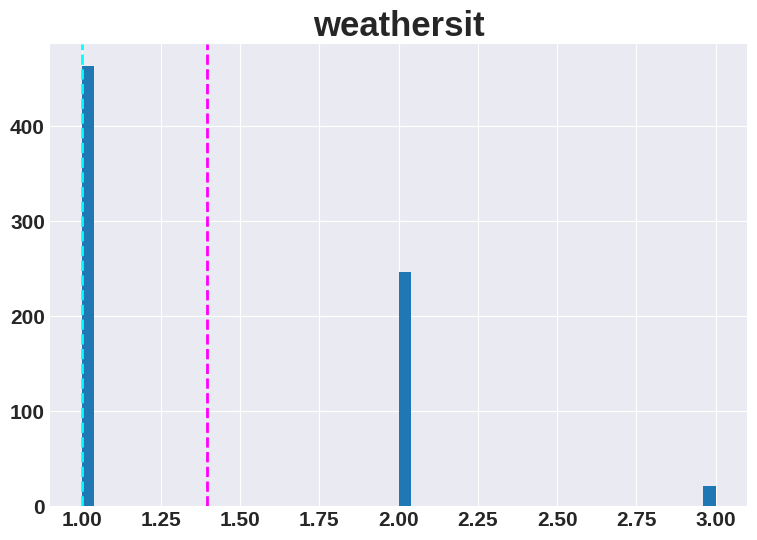

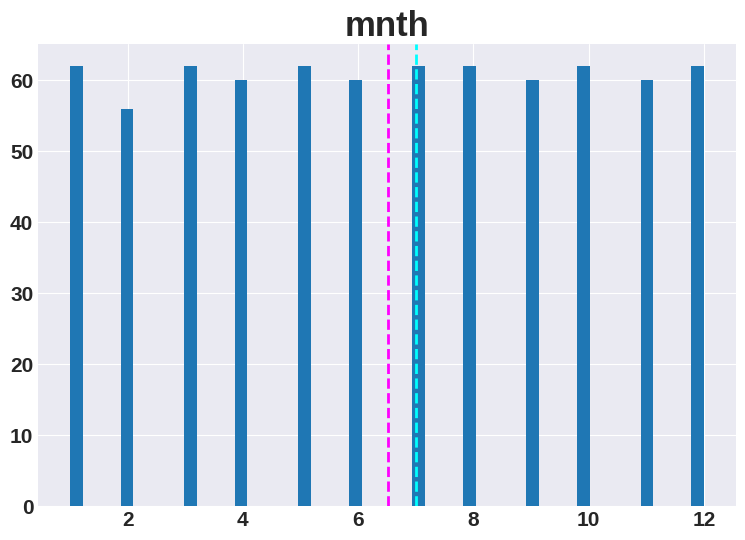

In [ ]:
for col in categorical_cols:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    feature.hist(bins = 50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    plt.title(col)
plt.show()

# Bivariate Analysis

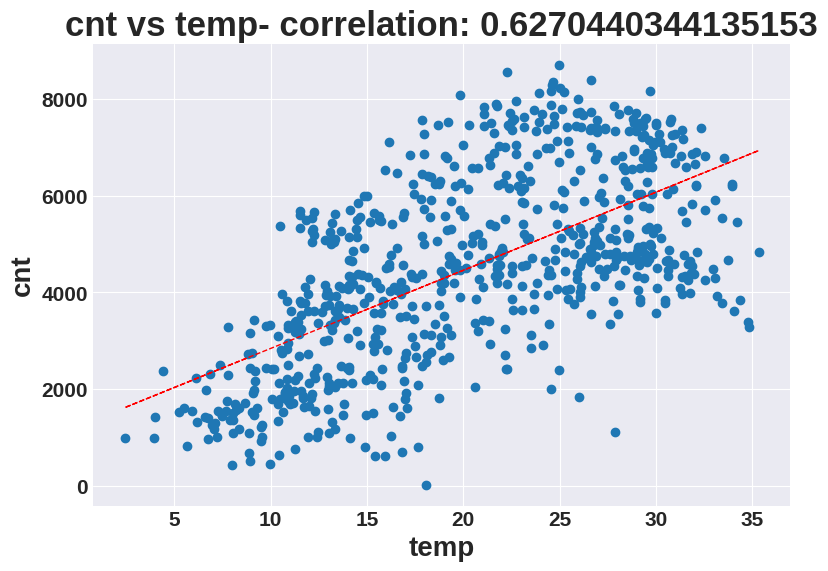

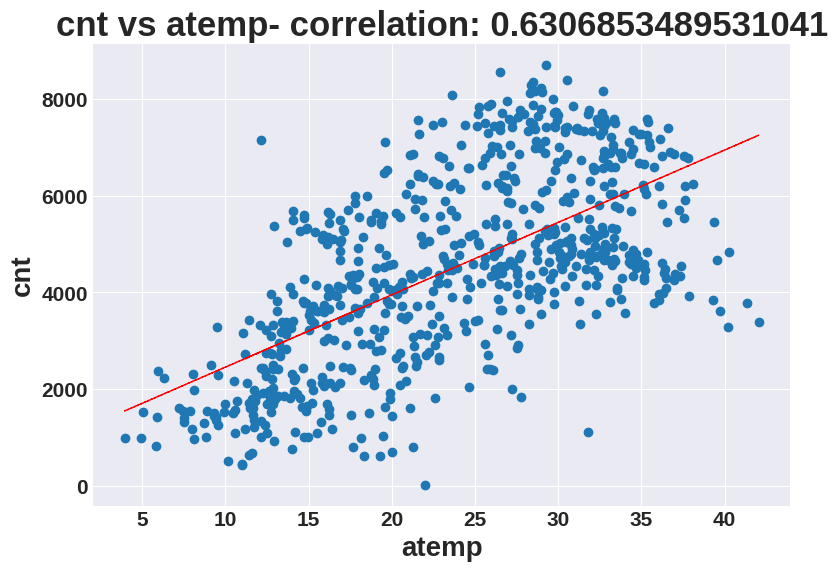

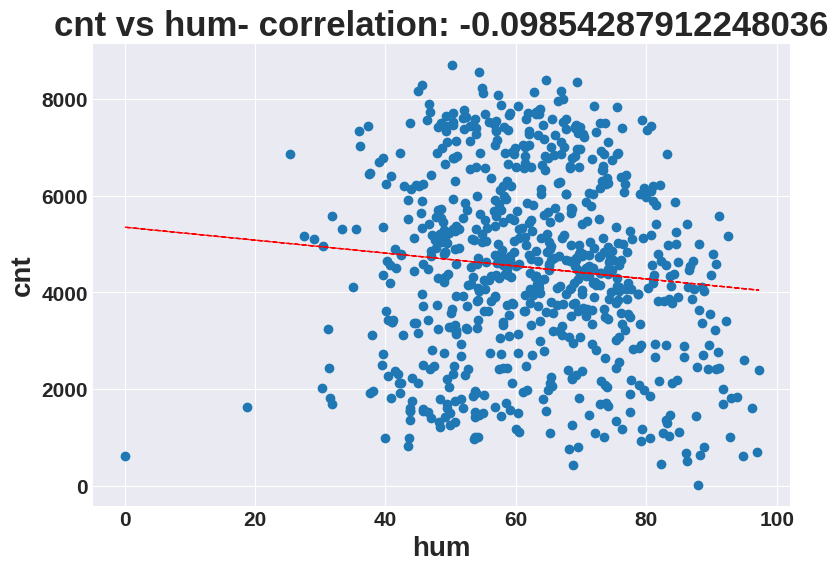

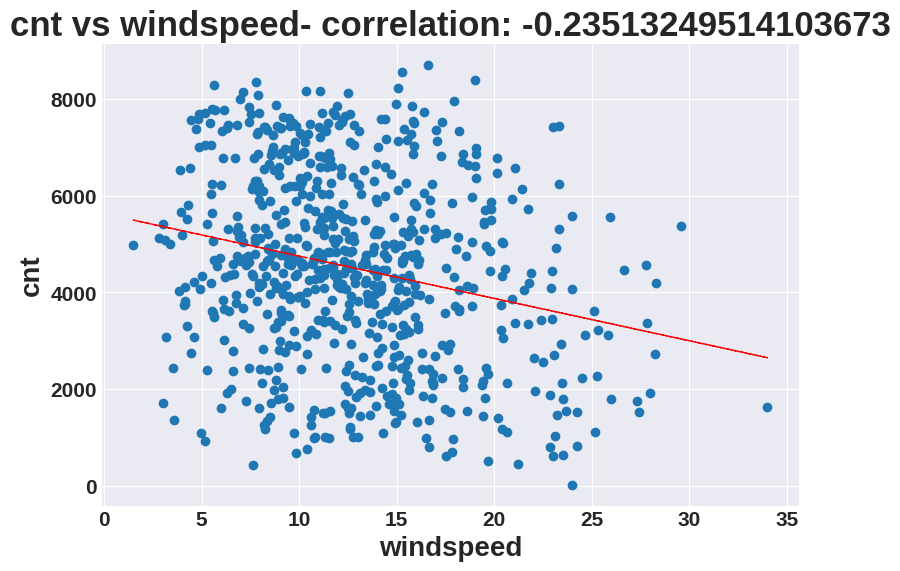

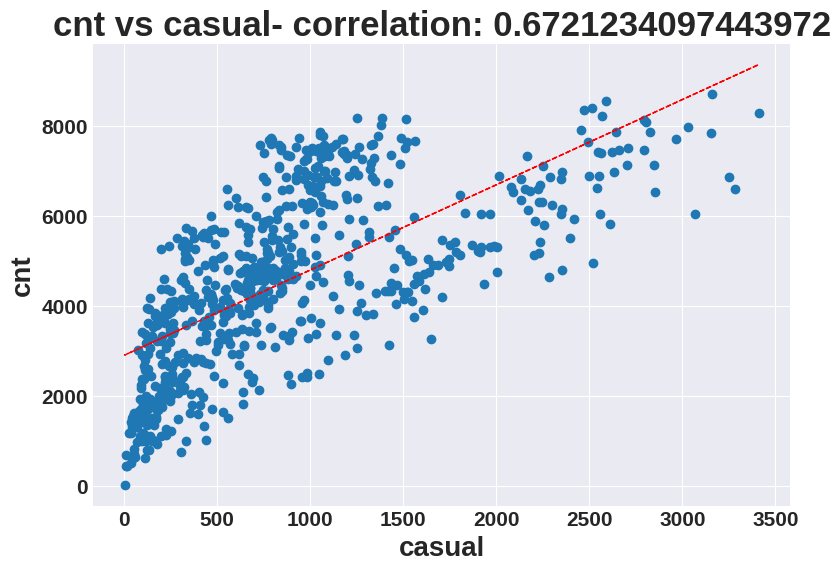

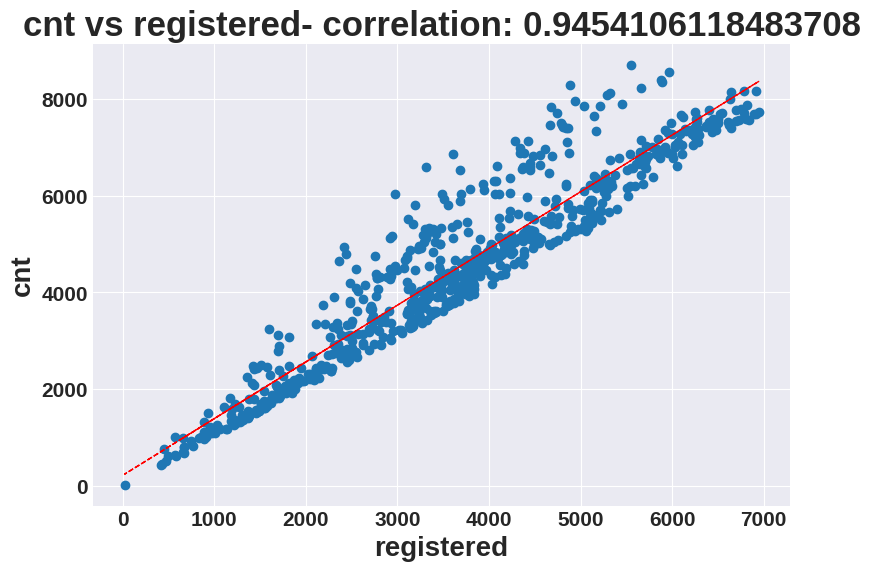

In [ ]:
for col in numeric_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['cnt']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('cnt')
    ax.set_title('cnt vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['cnt'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

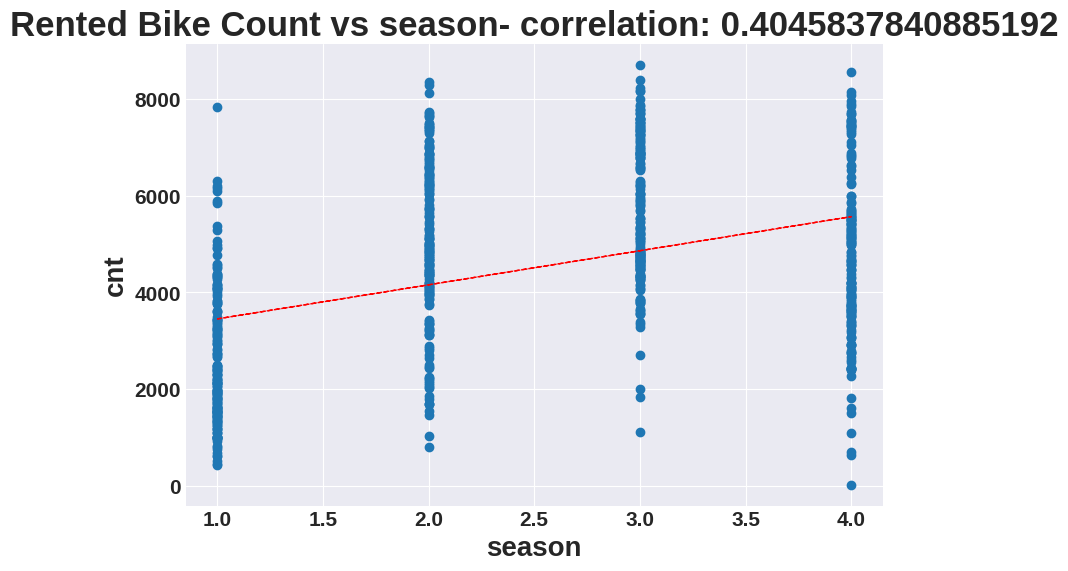

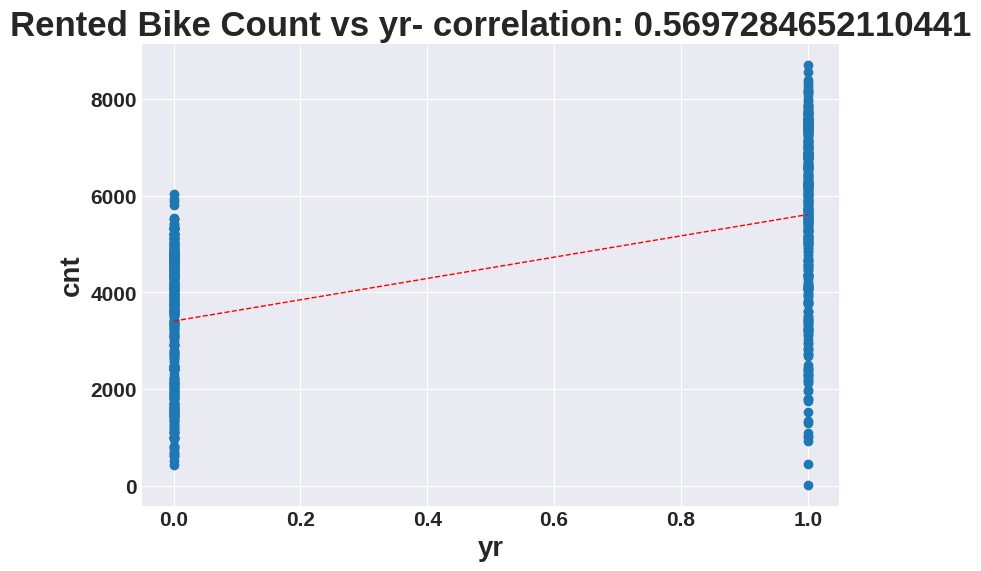

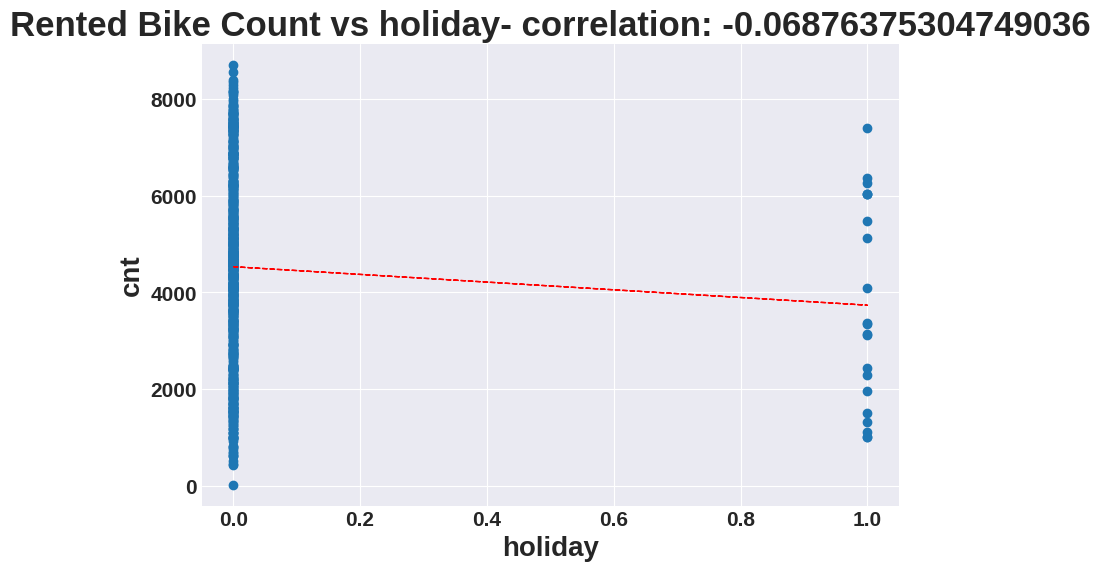

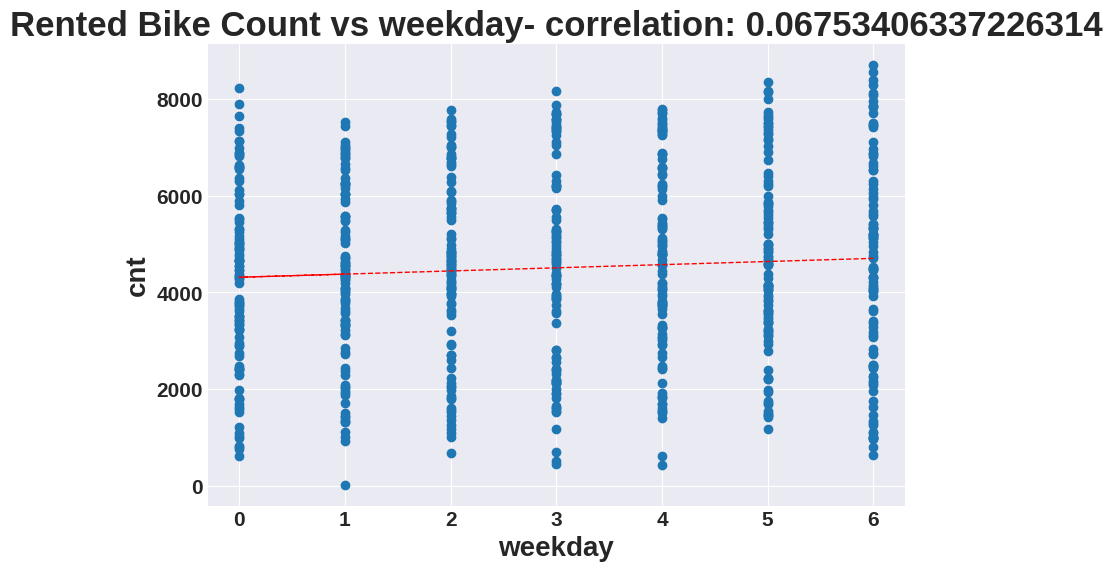

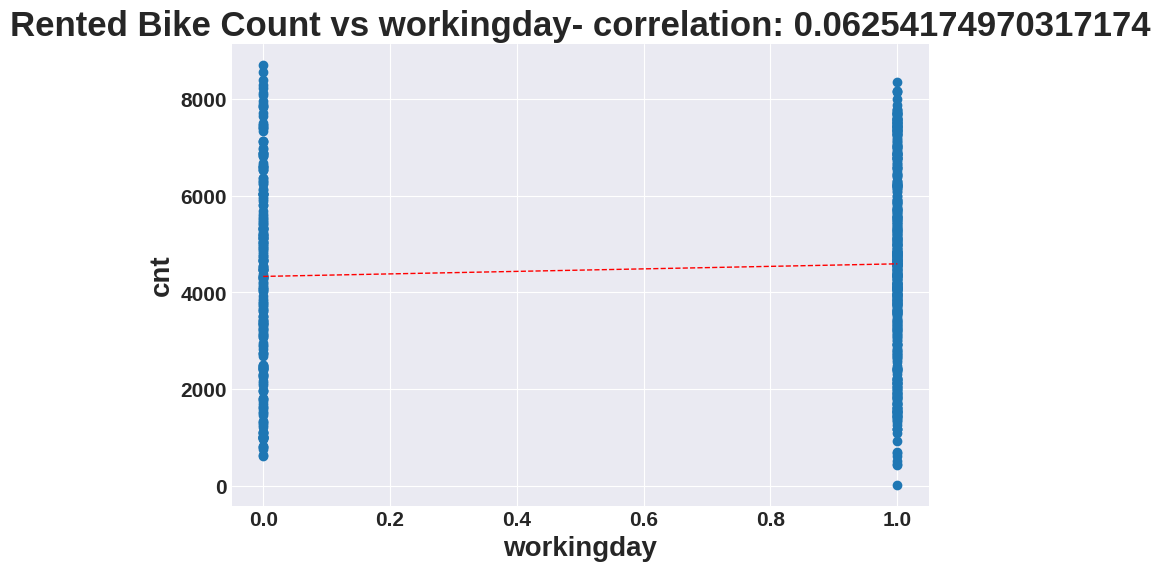

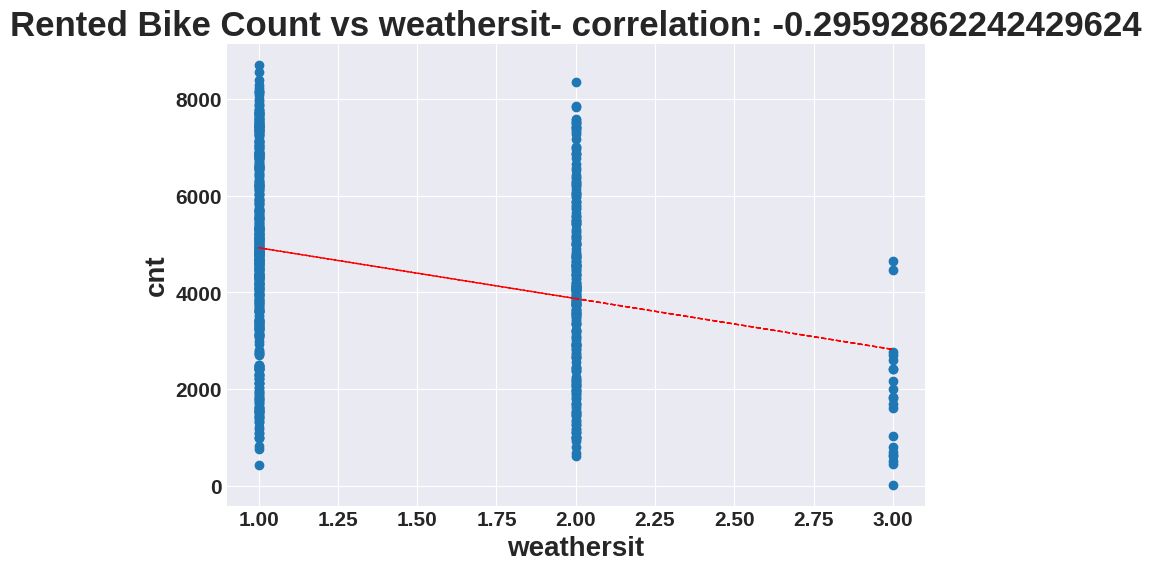

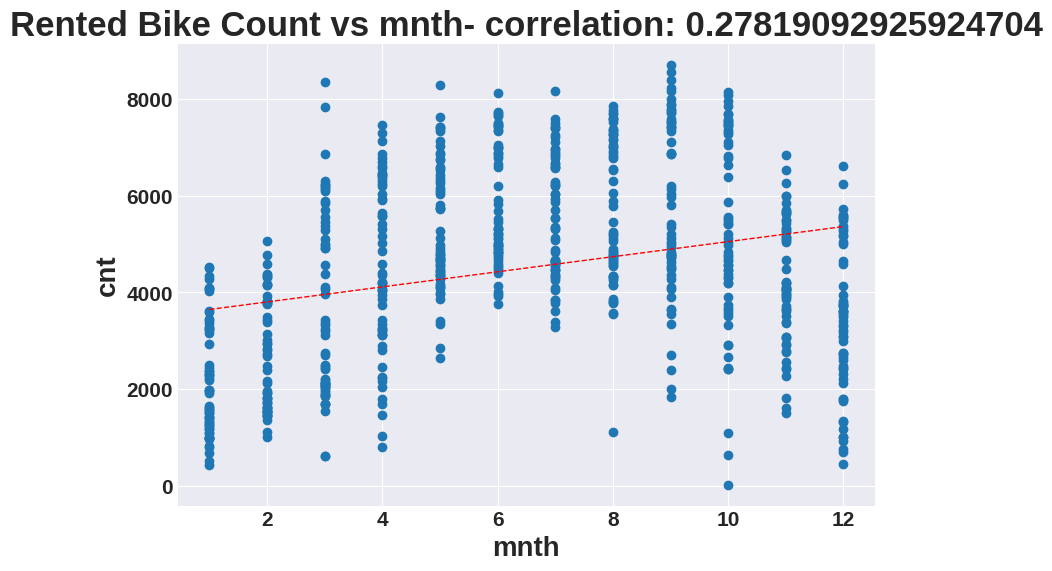

In [ ]:
for col in categorical_cols:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['cnt']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('cnt')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['cnt'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

<Axes: >

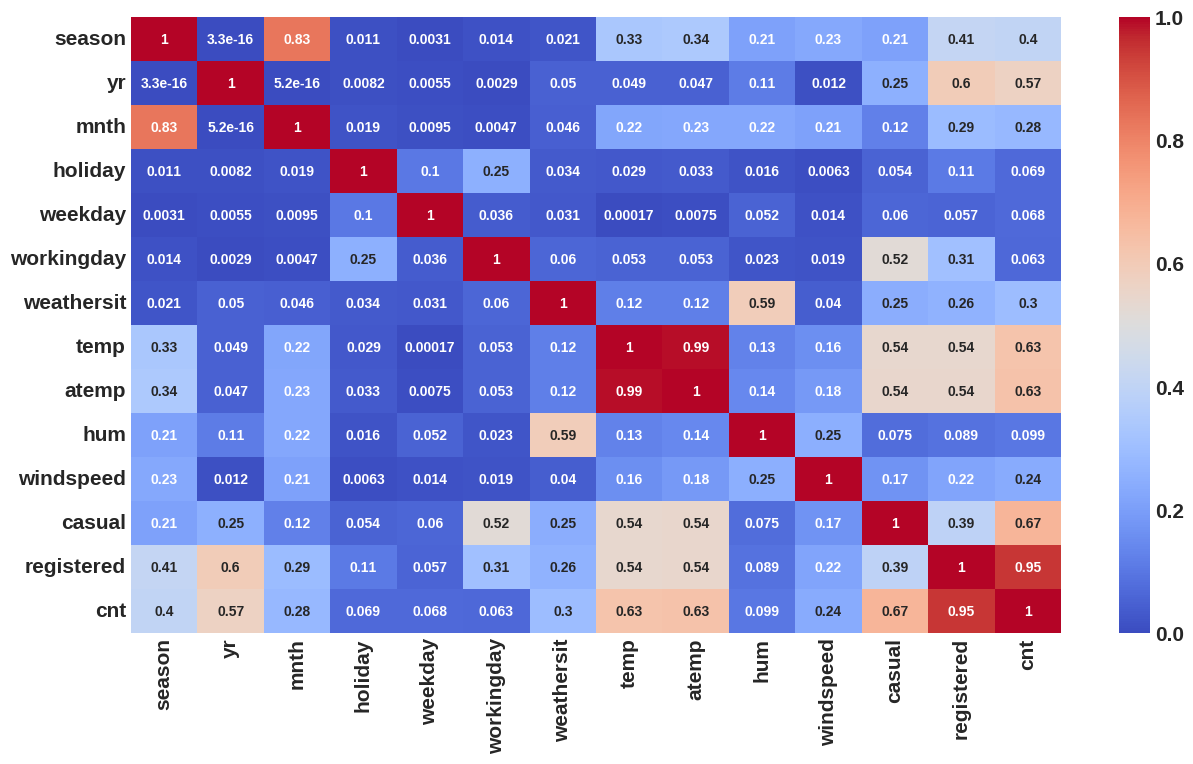

In [ ]:
## Correlation
plt.figure(figsize=(15,8))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
# Make copy of dataset
df = dataset.copy()

In [ ]:
df.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


#**Obseravations:**

-> Peak Demand Times: Bike usage is highest during morning and evening hour matching daily commute patterns.

-> Weekly Trends: Demand is higher on working days compared to weekends and holidays.

-> Seasonal Impact: Warmer seasons (spring and summer) show higher bike demand, while colder months see a drop.

-> Weather Influence: Clear and pleasant weather increases rides, while rain, humidity, and wind reduce usage.

-> Data Insights: The dataset is clean and ready for modeling, with features like season, weather, and temperature strongly influencing demand.

-> Key Takeaway: Bike-sharing demand depends on a mix of time, weather, and seasonal factors—insights that can help in efficient resource planning and operations.

# Modeling

In [ ]:
#Multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def Calculate_vif(X):
    '''
    Calculating VIF
    '''
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['cnt']]])

,variables,VIF
0,season,24.816777
1,yr,5.533413
2,mnth,15.372000
3,holiday,1.107278
4,weekday,3.260225
5,workingday,9.458338
6,weathersit,14.459583
7,temp,493.310559
8,atemp,571.718937
9,hum,28.077524


In [ ]:
df = df.drop(['atemp','registered','season','casual','hum'],axis=1)

In [ ]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['cnt']]])

,variables,VIF
0,yr,1.944191
1,mnth,4.582960
2,holiday,1.092670
3,weekday,3.082351
4,workingday,3.217273
5,weathersit,6.125517
6,temp,6.699629
7,windspeed,5.247690


In [ ]:
df.head(2)

,yr,mnth,holiday,weekday,workingday,weathersit,temp,windspeed,cnt
0,0,1,0,6,0,2,14.110847,10.749882,985
1,0,1,0,0,0,2,14.902598,16.652113,801


In [ ]:
#standardise continuous features

from sklearn.preprocessing import StandardScaler

num_cols = ['temp', 'windspeed', 'yr']  # numeric columns in final features
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

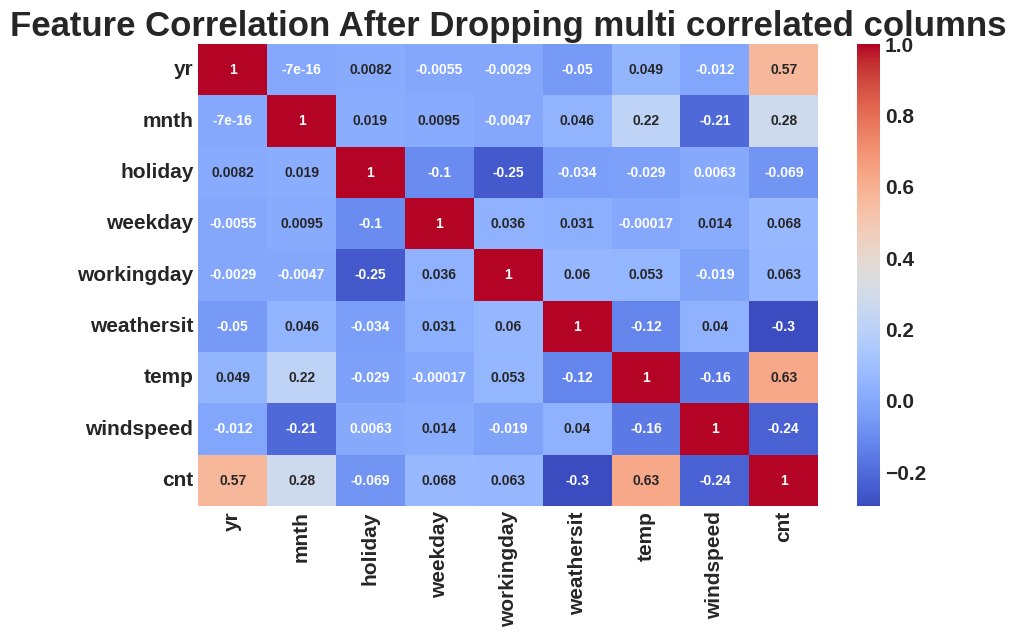

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation After Dropping multi correlated columns")
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    float64
 1   mnth        730 non-null    int64  
 2   holiday     730 non-null    int64  
 3   weekday     730 non-null    int64  
 4   workingday  730 non-null    int64  
 5   weathersit  730 non-null    int64  
 6   temp        730 non-null    float64
 7   windspeed   730 non-null    float64
 8   cnt         730 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 51.5 KB


# **Linear Regression**

In [ ]:
# lets import train test split for splitting the data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
dependent_variable = 'cnt'

In [ ]:
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})
independent_variables

['yr',
 'holiday',
 'mnth',
 'workingday',
 'temp',
 'weathersit',
 'weekday',
 'windspeed']

In [ ]:
y = np.sqrt(df['cnt'])

X = df.drop('cnt',axis=1)

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train[0:10]

,yr,mnth,holiday,weekday,workingday,weathersit,temp,windspeed
239,-1.0,8,0,0,0,1,1.155777,1.473059
97,-1.0,4,0,5,1,2,-0.873163,0.470861
503,1.0,5,0,6,0,1,0.570645,-1.374597
642,1.0,10,0,5,1,1,0.652627,-1.085875
498,1.0,5,0,1,1,2,0.424896,0.286337
303,-1.0,10,0,1,1,1,-0.850388,-1.085875
570,1.0,7,0,3,1,1,1.249281,-0.331650
250,-1.0,9,0,4,1,3,0.755997,0.028985
17,-1.0,1,0,2,1,2,-1.524466,-0.564240
595,1.0,8,0,0,0,2,0.766490,-1.342660


In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Checking shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(584, 8)
(584,)
(146, 8)
(146,)


In [ ]:
X_train[0:10]

array([[0.        , 0.63636364, 0.        , 0.        , 0.        ,
        0.        , 0.80735084, 0.65710461],
       [0.        , 0.27272727, 0.        , 0.83333333, 1.        ,
        0.5       , 0.34478502, 0.46257665],
       [1.        , 0.36363636, 0.        , 1.        , 0.        ,
        0.        , 0.67395007, 0.1043704 ],
       [1.        , 0.81818182, 0.        , 0.83333333, 1.        ,
        0.        , 0.69264081, 0.16041174],
       [1.        , 0.36363636, 0.        , 0.16666667, 1.        ,
        0.5       , 0.64072168, 0.42676029],
       [0.        , 0.81818182, 0.        , 0.16666667, 1.        ,
        0.        , 0.34997731, 0.16041174],
       [1.        , 0.54545455, 0.        , 0.5       , 1.        ,
        0.        , 0.82866825, 0.30680802],
       [0.        , 0.72727273, 0.        , 0.66666667, 1.        ,
        1.        , 0.71620734, 0.37680772],
       [0.        , 0.        , 0.        , 0.33333333, 1.        ,
        0.5       , 0.196298

In [ ]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Cheeck coefficents
regressor.coef_

array([ 15.0532961 ,   7.72563168,  -4.35413727,   3.01255067,
         0.78321168, -12.39812967,  36.33397539,  -8.71566062])

In [ ]:
pd.DataFrame(regressor.coef_,X.columns, columns=['Coefficient'])

,Coefficient
yr,15.053296
mnth,7.725632
holiday,-4.354137
weekday,3.012551
workingday,0.783212
weathersit,-12.398130
temp,36.333975
windspeed,-8.715661


In [ ]:
# Check intercept
regressor.intercept_

np.float64(37.97523734543968)

In [ ]:
# Checking score
regressor.score(X_train,y_train)

0.7471938647247854

In [ ]:
# Y peredictions on train data
y_pred_train = regressor.predict(X_train)

# y predictions on test data
y_pred = regressor.predict(X_test)

In [ ]:
# Evaluation of test data set

#Calculate Mean Absolute Error.
MAE = mean_absolute_error(y_test,y_pred)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE = mean_squared_error(y_test,y_pred)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2 = r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

#Calculate adjusted R2 Score
adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 5.966340708211904.
The Mean Squred Error(MSE) is 62.52487445620587.
The Root Mean Squared Error(RMSE) is 7.90726719266561.
The R2 Score is 0.7899235111869596.
Adjusted R2 is 0.7776562709643002.


In [ ]:
#Saving train data set results in dataframe.
test_dict = {'Model':"Linear Regression",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [ ]:
# create test_result dataframe
test_results_df = pd.DataFrame(test_dict,index=[0])
test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Linear Regression,5.9663,62.5249,7.9073,0.7899,0.7777


In [194]:
# define a fucntion to plot predicted y values and actual y values
def plot_Pred_vs_actual(y_pred_test,y_test):
  '''
  Visualize predicted values with actual values.
  '''
  plt.figure(figsize=(20,8))
  plt.plot(y_pred_test)
  plt.plot(np.array(y_test))
  plt.legend(["Predicted","Actual"],)
  plt.title("Predicted V/S Actual")
  plt.show()

In [195]:
# define a function to plot scatter plot for y_test and y_actual.
def plot_scatter(y_pred_test,y_test):
  '''
  Plot scatter plot for y_test values and y_test values. To check how close we are to regresson line
  '''
  plt.figure(figsize=(16,5))
  sns.regplot(x = y_test,y = y_pred_test, line_kws={'color':'red'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")

In [196]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed).
def Residual_distPlot(y_pred_test,y_test):
  '''
  Checks the distribution of residals
  '''

  plt.figure(figsize=(10,5))
  sns.distplot(x = y_test-y_pred_test)
  plt.title("Residual Distribution")

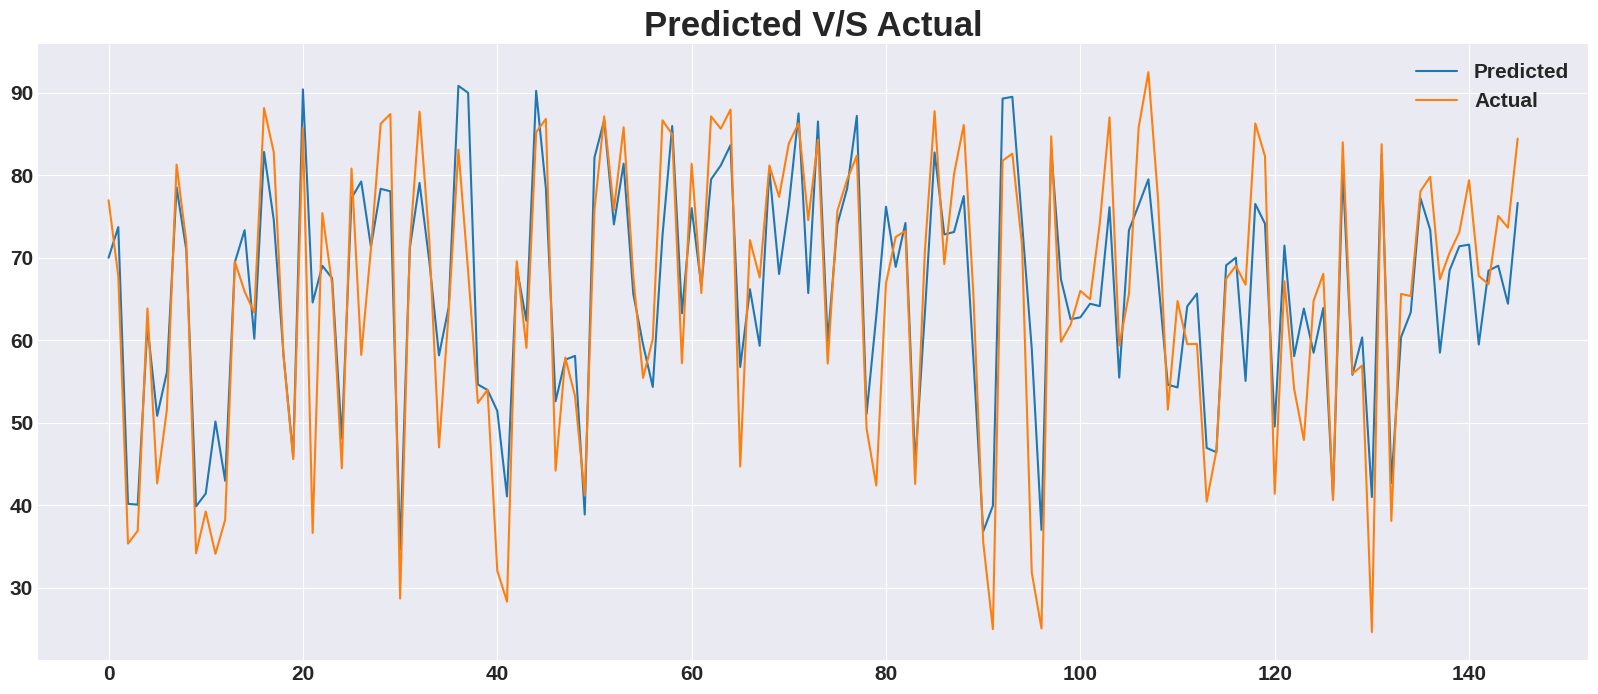

In [197]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

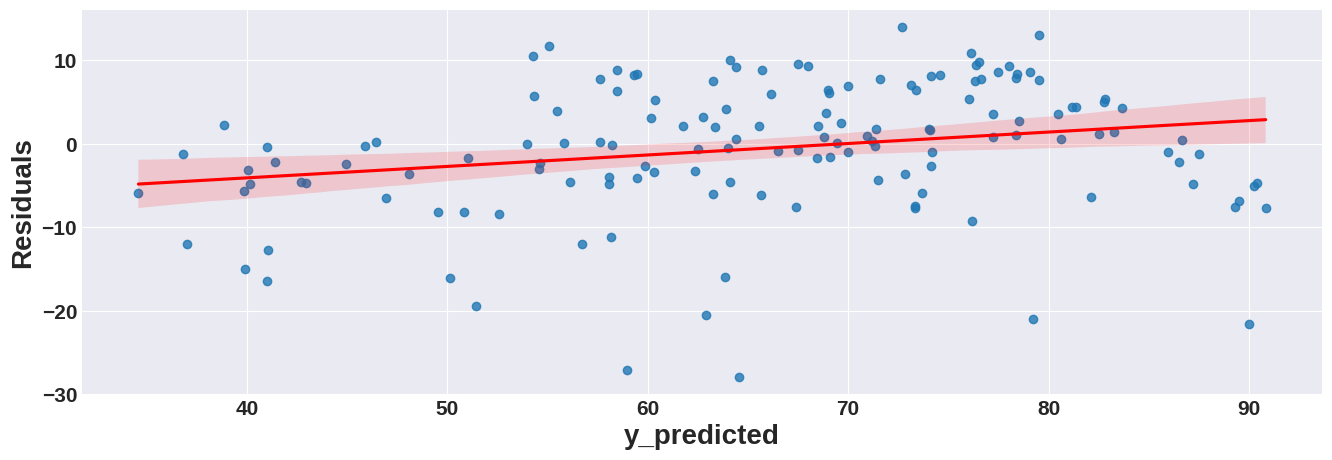

In [198]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x = y_pred, y = y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

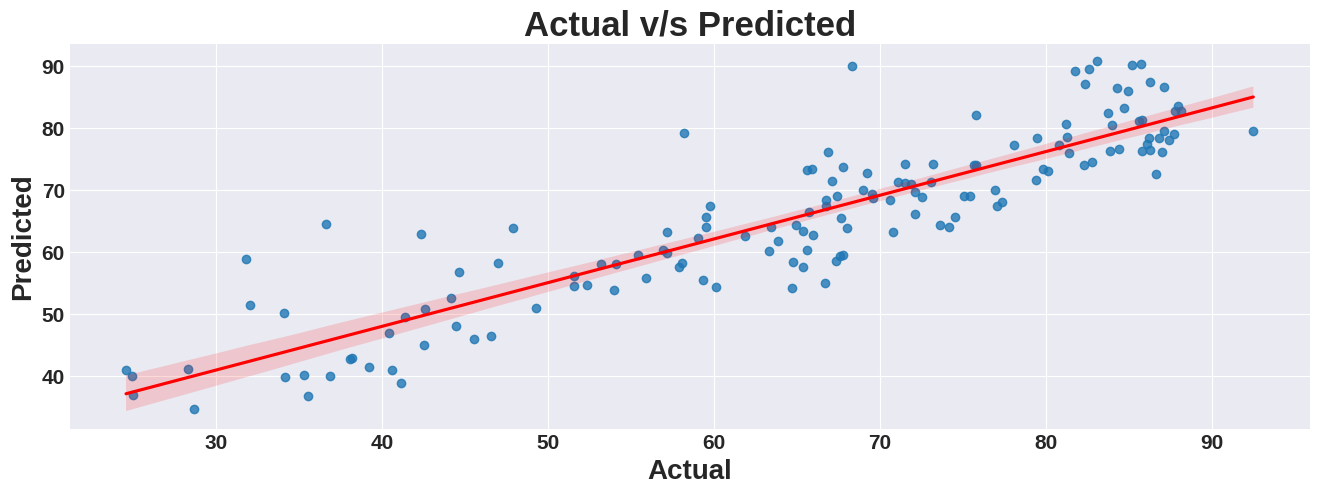

In [199]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

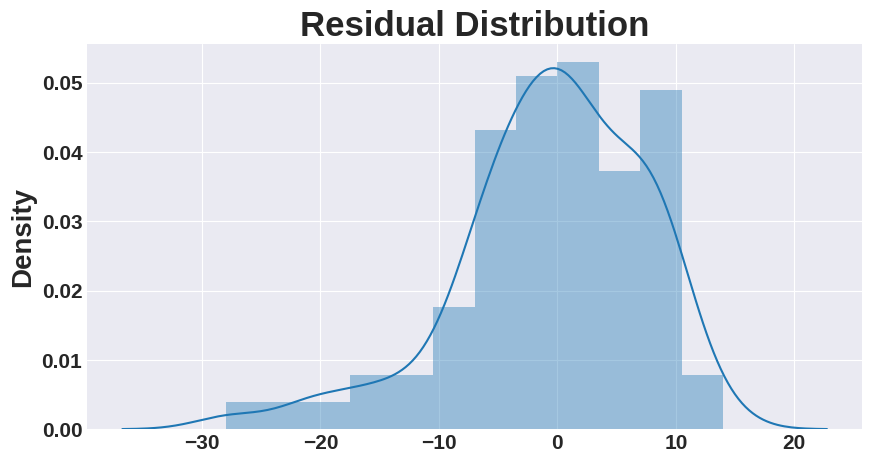

In [200]:
Residual_distPlot(y_pred,y_test)

Residuals = (Actual value − Predicted value)

If residual = 0 → perfect prediction

Negative residual → model overpredicted

Positive residual → model underpredicted